# 1.1 Investigate trends in users

## Current conclusions

- First question should split into 4 categories: Meat - Pescetarian - Vegetarian - Vegan

Current customers<br>
No exclusions: 60%<br>
Pescetarian: 3%<br>
Vegetarian: 6%<br>
Vegan: 5%<br>
<br>

In [10]:
from loguru import logger
from game.utils import run_query
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
query_limit = """
        SELECT * 
        FROM deliveries 
        LIMIT 10
        """

In [12]:
query_all = """
            SELECT * 
            FROM users
            """

In [13]:
df_users = run_query(query=query_all)
df_users

2020-09-18 14:12:45.278 | INFO     | game.utils:run_query:20 - Running query: 
            SELECT * 
            FROM users
            
2020-09-18 14:12:45.282 | INFO     | game.utils:get_connection:7 - Handling connection to PostgreSQL database


,first_name,id,signed_up_on,meal_plan,excluded_food_groups
0,,3163,2016-08-31,Balanced,[]
1,,22465,2018-04-01,Balanced,[Pork]
2,,32807,2018-09-09,Balanced,[Shellfish]
3,,33157,2018-09-13,Plant-Based,"[Beef, Lamb, Pork, Chicken, Fish, Shellfish]"
4,,51729,2019-03-07,Protein-Packed,"[Beef, Lamb, Shellfish, Pork, Vegan]"
...,...,...,...,...,...
112744,None,52660,2019-03-14,Pescetarian,"[Beef, Lamb, Pork, Chicken]"
112745,None,53834,2019-03-23,Pescetarian,"[Beef, Chicken, Lamb, Pork]"
112746,None,56186,2019-04-10,Pescetarian,"[Beef, Chicken, Lamb, Pork]"
112747,None,57551,2019-04-24,Pescetarian,"[Beef, Chicken, Lamb, Pork]"


In [14]:
excluded = df_users["excluded_food_groups"].str.len() != 0

In [15]:
excluded.value_counts(normalize=True)*100

False    60.27814
True     39.72186
Name: excluded_food_groups, dtype: float64

Text(0.5, 0, 'Excluded food group')

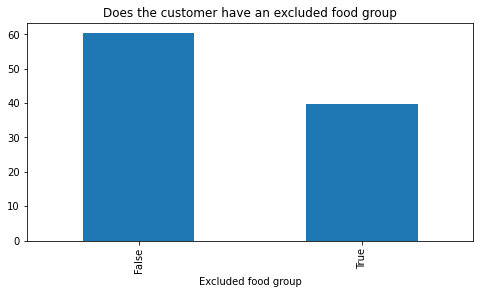

In [16]:
plt.figure(figsize=(8,4))
plt.title('Does the customer have an excluded food group')
excluded_percent = excluded.value_counts(normalize=True)*100
excluded_percent.plot(kind='bar')
plt.xlabel('Excluded food group')

<AxesSubplot:title={'center':'Breakdown of excluded food groups'}>

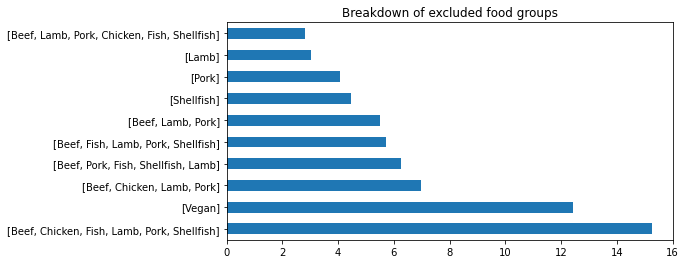

In [17]:
plt.figure(figsize=(8,4))
plt.title('Breakdown of excluded food groups')
excluded_breakdown_percent = df_users[excluded]['excluded_food_groups'].value_counts(normalize=True).nlargest(10)*100
excluded_breakdown_percent.plot(kind='barh')

<AxesSubplot:>

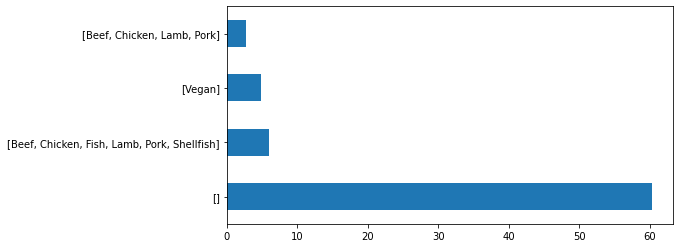

In [18]:
plt.figure(figsize=(8,4))
top_3_diets_percent = df_users['excluded_food_groups'].value_counts(normalize=True).nlargest(4)*100
top_3_diets_percent.plot(kind='barh')

Doesn't seem to be any allergy information (e.g. nuts) in these tables

In [19]:
top_3_diets_percent

TypeError: unhashable type: 'list'

<AxesSubplot:title={'center':'Meal plans'}, xlabel='meal_plan', ylabel='count'>

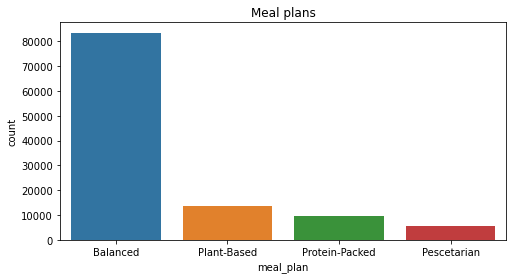

In [20]:
plt.figure(figsize=(8,4))
plt.title('Meal plans')
sns.countplot(df_users['meal_plan'])

<AxesSubplot:title={'center':'Number of exclusions per customer, for those with at least one exclusion'}, xlabel='excluded_food_groups', ylabel='count'>

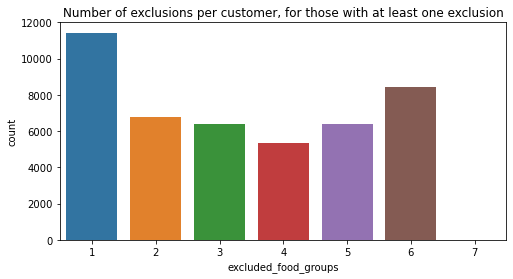

In [21]:
plt.figure(figsize=(8,4))
plt.title('Number of exclusions per customer, for those with at least one exclusion')
sns.countplot(df_users[excluded]['excluded_food_groups'].str.len())

<AxesSubplot:xlabel='excluded_food_groups', ylabel='count'>

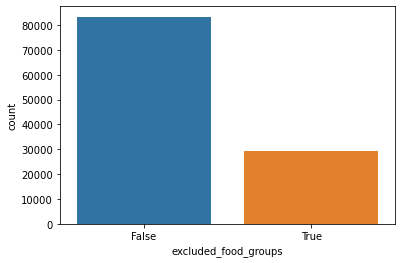

In [22]:
sns.countplot(df_users['excluded_food_groups'].apply(lambda x: 'Pork' in x))

In [23]:
excluded_items = ['Beef', 'Chicken', 'Fish', 'Lamb', 'Pork', 'Shellfish', 'Vegan',
                 ]

# User order history

In [24]:
query_deliveries = """
            SELECT * 
            FROM deliveries
            """

In [25]:
df_deliveries = run_query(query=query_deliveries)
df_deliveries

2020-09-18 14:13:12.058 | INFO     | game.utils:run_query:20 - Running query: 
            SELECT * 
            FROM deliveries
            
2020-09-18 14:13:12.060 | INFO     | game.utils:get_connection:7 - Handling connection to PostgreSQL database


,delivery_date,delivery_dow,id,portion_count,price_pence,recipient_postcode_prefix,user_id
0,2017-06-26,1.0,275876,4,7200,BA1,8942
1,2017-06-26,1.0,275872,1,2700,ST5,8941
2,2017-06-26,1.0,275868,2,2800,EH49,8940
3,2017-06-25,0.0,275864,1,4500,E14,8939
4,2017-06-26,1.0,275860,2,2800,CB8,8938
...,...,...,...,...,...,...,...
1014268,2020-05-01,5.0,8567039,1,2950,KT4,130055
1014269,2020-05-01,5.0,8567047,2,3550,CR8,130056
1014270,2020-05-01,5.0,8567055,2,3750,G51,130057
1014271,2020-05-01,5.0,8567063,1,3750,BS20,116383


In [26]:
no_of_deliveries = df_deliveries['user_id'].value_counts()

In [27]:
no_of_deliveries

2379      212
4931      199
473       194
2216      190
360       189
         ... 
59073       1
123389      1
129355      1
127306      1
106804      1
Name: user_id, Length: 112749, dtype: int64

<AxesSubplot:>

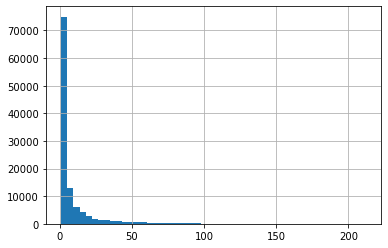

In [28]:
no_of_deliveries.hist(bins=50)

In [29]:
bins = ['1', '2-5', '6-10', '11-50', '51-100', '101-250']

In [30]:
d = {'range': bins, 'order_no': [sum(no_of_deliveries == 1),
                             (sum(no_of_deliveries <= 5) - sum(no_of_deliveries <= 1)),
                             (sum(no_of_deliveries <= 10) - sum(no_of_deliveries <= 5)),
                             (sum(no_of_deliveries <= 50) - sum(no_of_deliveries <= 10)),
                             (sum(no_of_deliveries <= 100) - sum(no_of_deliveries <= 50)),
                             (sum(no_of_deliveries <= 250) - sum(no_of_deliveries <= 100))
                            ]}

In [31]:
df_order_numbers = pd.DataFrame(data=d)

In [32]:
df_order_numbers['order_no_percent'] = df_order_numbers['order_no'] / 112749 * 100
df_order_numbers['order_no_percent'] = df_order_numbers['order_no_percent'].round()

In [33]:
df_order_numbers

,range,order_no,order_no_percent
0,1,24002,21.0
1,2-5,50976,45.0
2,6-10,14788,13.0
3,11-50,19228,17.0
4,51-100,3173,3.0
5,101-250,582,1.0


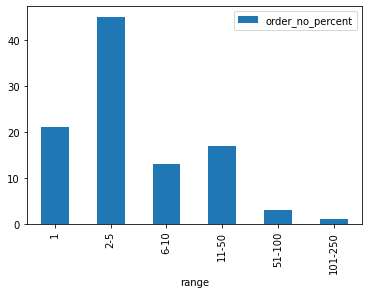

In [34]:
ax = df_order_numbers.plot.bar('range', 'order_no_percent')